Лабораторна робота №8 Студентки групи БС-83 Харченко Софії

Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).

In [45]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [59]:
data = pd.DataFrame({
    "num":[1,2,3,4,5,6,7,8,9,10],
    "data1":[17,15,22,22,69,35,42,17,12,55],
    "data2": [14.5,18.333,59.6,89.6,44.0,20.14,55.9,10.10,66.33,96.6],
    "data3": [116.00, 158.2, 114.7, 136.20, 114.44, 99.1, 132.2,145.6,136.5,100.00]
})
num = data.shape[0]
data

,num,data1,data2,data3
0,1,17,14.500,116.00
1,2,15,18.333,158.20
2,3,22,59.600,114.70
3,4,22,89.600,136.20
4,5,69,44.000,114.44
5,6,35,20.140,99.10
6,7,42,55.900,132.20
7,8,17,10.100,145.60
8,9,12,66.330,136.50
9,10,55,96.600,100.00


In [60]:
data_data = pd.DataFrame({
    "Name": ["Среднє відхилення","Стандартне відхилення"],
    "data1":[sum(data.iloc[:,1]/num), data.iloc[:,1].std()],
    "data2":[sum(data.iloc[:,2]/num), data.iloc[:,2].std()],
    "data3": [sum(data.iloc[:,3]/num), data.iloc[:,3].std()]
})
data_data

,Name,data1,data2,data3
0,Среднє відхилення,30.600000,47.510300,125.294000
1,Стандартне відхилення,19.224984,31.365323,19.521154


Графік розкиду в групах

[Text(0, 0.5, 'Наявнсть розпушування'), Text(0.5, 0, 'Річний приріст')]

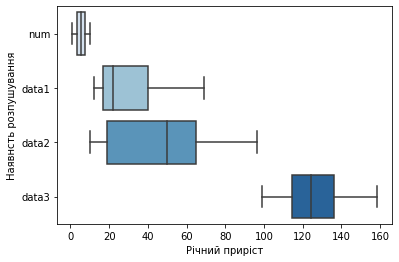

In [61]:
sns.boxplot( data = data, orient='h', palette='Blues').set(xlabel='Річний приріст', 
                                                        ylabel='Наявнсть розпушування')

In [65]:
data.loc[data.shape[0]+1] = ["Summ: ",sum(data.iloc[:,1]), sum(data.iloc[:,2]), sum(data.iloc[:,3])]
data.loc[data.shape[0]+1] = ["Average: ", round(data.iloc[n,1]/n, 2), round(data.iloc[n,2]/n, 2), round(data.iloc[n,3]/n, 2)]
n = data.shape[0]
data

,num,data1,data2,data3
0,1,17.0,14.500,116.00
1,2,15.0,18.333,158.20
2,3,22.0,59.600,114.70
3,4,22.0,89.600,136.20
4,5,69.0,44.000,114.44
5,6,35.0,20.140,99.10
6,7,42.0,55.900,132.20
7,8,17.0,10.100,145.60
8,9,12.0,66.330,136.50
9,10,55.0,96.600,100.00


In [66]:
summa = sum(data.iloc[n-2, 1:])
print("Summa all: ", summa)

Summa all:  8136.1720000000005


 Функція, що реалізовує однофакторний дисперсійний аналіз.

In [80]:
def Dispersion(data, n):    
    first_sum = data.iloc[n-2,1]
    second_sum = data.iloc[n-2,2]
    third_sum = data.iloc[n-2, 3]
    Tc2 = first_sum**2 + second_sum**2 + third_sum**2
    c = data.shape[1]-1
    n = data.shape[0]-2
    N = n*c
    sum2 = sum(data.iloc[n, 1:])**2
    constanta = sum2/N
    xi2 = 0
    for i in range(0, n):
        xi2 += data.iloc[i, 1]**2
    for i in range(0, n):
        xi2 += data.iloc[i, 2]**2
    for i in range(0, n):
        xi2 += data.iloc[i, 3]**2
    
    SSfact = Tc2/n - constanta
    print("SS-фактичне:", SSfact)
    SSzag = xi2 - sum2/N
    print("SS-загальне:", SSzag)
    SSvip = SSzag - SSfact
    print("SS-випадкове:", SSvip)
    
    dfact = c - 1
    print("\nd-фактичне:", dfact)
    dzag = N - 1
    print("d-загальне:", dzag)
    dvip = dzag - dfact
    print("d-випадкове:", dvip)
    
    MSfact = SSfact/dfact
    print("\nMS-фактичне:", MSfact)
    MSvip = SSvip/dvip
    print("MS-випадкове:", MSvip)
    
    Femp = MSfact/MSvip
    print("\nF-емпіричне", Femp)
    Fcrit = pd.read_excel("Fisher.xlsx").iloc[dzag-2, dfact]
    if (Fcrit >= Femp):
        print("Accept", Fcrit, ">", Femp)
    else:
        print("Reject", Fcrit, "<", Femp)
    
    data_end = pd.DataFrame({
        "Назва":["Фактичне", "Випадкове", "Загальне"],
        "SS":[SSfact, SSvip, SSzag],
        "d":[dfact, dvip, dzag],
        "MS":[MSfact, MSvip, None]
    })
    return data_end

Вивести результати розрахунку кожного з етапів вказаних вище у вигляді таблиці.
Перевірити результат роботи функції на реальних або сгенерованих даних.

In [82]:
Dispersion(data,num)

SS-фактичне: -1836882.418246778
SS-загальне: 7811805.657212222
SS-випадкове: 9648688.075459

d-фактичне: 2
d-загальне: 35
d-випадкове: 33

MS-фактичне: -918441.209123389
MS-випадкове: 292384.4871351212

F-емпіричне -3.1412104592913814
Reject nan < -3.1412104592913814


,Назва,SS,d,MS
0,Фактичне,-1.836882e+06,2,-918441.209123
1,Випадкове,9.648688e+06,33,292384.487135
2,Загальне,7.811806e+06,35,NaN


Висновок:
Під час проведення дисперсійного аналізу був отриманий результат 𝐹емпіричне > 𝐹критичне , що свідчить про те що нульову гіпотезу про рівність середніх ми відхиляємо і приймаємо альтернативну: середні незалежних груп - відмінні.
